In [1]:
!pwd


/home/art/mydir/dev/aisc_2023/Inducing-human-like-biases-in-moral-reasoning-LLMs


In [43]:
from csv import DictReader
from nilearn.masking import compute_epi_mask, apply_mask
from pathlib import Path
from subprocess import run

import bids
import bin.fMRI_utils as fmriu
import matplotlib as mpl
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
import nilearn.maskers
import numpy as np

fmriu.init_scenarios()


In [17]:
subjects_data = []
layout = bids.BIDSLayout(fmriu.datapath / "ds000212", config=['bids', 'derivatives'])
for subject in list(layout.get_subjects()):
    subject_path = fmriu.datapath / f"ds000212/sub-{subject}/func/"
    run_num = 0
    masked_data_items = []
    scenario_items = []
    for bold_f in subject_path.glob("*.nii.gz"):
        run_num = run_num+1
        try:
            masked_data = fmriu.extract_fmri_data(subject, run_num, bold_f)
            scenarios = fmriu.extract_scenarios(subject, run_num, bold_f)
            masked_data_items.append(masked_data)
            scenario_items.append(scenarios)
        except:
            print(f'Failed for {bold_f}')
    subjects_data.append(
        (masked_data_items, scenario_items)
    )

In [25]:
sub_nums = list(layout.get_subjects())

['03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '22',
 '23',
 '24',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47']

In [24]:
from collections import Counter

jata_items_0_c = Counter(e[0].shape[0] for s in subjects_data for e in s[0] )
print(f'Most common shapes: {data_items_0_c}')
print(f'Most common shapes: {data_items_0_c}')
print(Counter(e[0].shape[0] for s in subjects_data for e in s[0] ).most_common()

Most common shapes: Counter({166: 232, 136: 70, 110: 67, 22: 1, 67: 1, 17: 1})


In [30]:
for i, (ds, ss) in enumerate(subjects_data ):
    print(f'Sub {sub_nums[i]}: {Counter(d.shape[0] for d in ds)}')

Sub 03: Counter({166: 6, 136: 4})
Sub 04: Counter({166: 6, 136: 4})
Sub 05: Counter({166: 6, 136: 4})
Sub 06: Counter({166: 6, 136: 4})
Sub 07: Counter({166: 5, 136: 4, 22: 1})
Sub 08: Counter({166: 6, 136: 4})
Sub 09: Counter({166: 6, 136: 4})
Sub 10: Counter({166: 6, 136: 4})
Sub 11: Counter({166: 6, 136: 4})
Sub 12: Counter({166: 6, 136: 4})
Sub 13: Counter({166: 6, 136: 4})
Sub 14: Counter({166: 6, 136: 4})
Sub 15: Counter({166: 6, 136: 4})
Sub 16: Counter({166: 6, 110: 4})
Sub 17: Counter({166: 5, 110: 4, 67: 1})
Sub 18: Counter({166: 6, 110: 4})
Sub 19: Counter({166: 6, 110: 4})
Sub 20: Counter({166: 6, 110: 4})
Sub 22: Counter({166: 6, 110: 4})
Sub 23: Counter({166: 6, 110: 4})
Sub 24: Counter({166: 6, 110: 4})
Sub 27: Counter({166: 6, 110: 4})
Sub 28: Counter({166: 6, 110: 4})
Sub 29: Counter({166: 6, 110: 4})
Sub 30: Counter({166: 6, 110: 4})
Sub 31: Counter({166: 6, 110: 4})
Sub 32: Counter({166: 6, 110: 3, 17: 1})
Sub 33: Counter({166: 6, 110: 4})
Sub 34: Counter({166: 6, 11

In [ ]:
from importlib import reload

In [ ]:
reload(fmriu)
sample_sub = subjects_data[6]
fmri= sample_sub[0][0]
mean = fmri.mean(axis=1)
std = fmri.std(axis=1)
numsfilter = fmriu.get_fmri_time_points_filter(fmri.shape)
x = range(fmri.shape[0])

##plt.figure(layout='constrained')
##plt.plot(x, mean, label='mean')  # Plot some data on the (implicit) axes.
##plt.plot(x, std, label='std')  # etc.
##plt.plot(x, numsfilter, label='filter')

fig, ax = plt.subplots(figsize=(20, 10), layout='constrained')
l1, = ax.plot(x, mean, label='mean', color='red')
ax2 = ax.twinx()
l2, = ax2.plot(x, std, label='std', color='blue')

#ax3.plot(t, s)
#ax3.set_xlabel('Angle [rad]')
#ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
#ax4.set_xlabel('Angle [°]')

[6, 22, 38, 54, 70, 86, 102, 118, 134, 150]


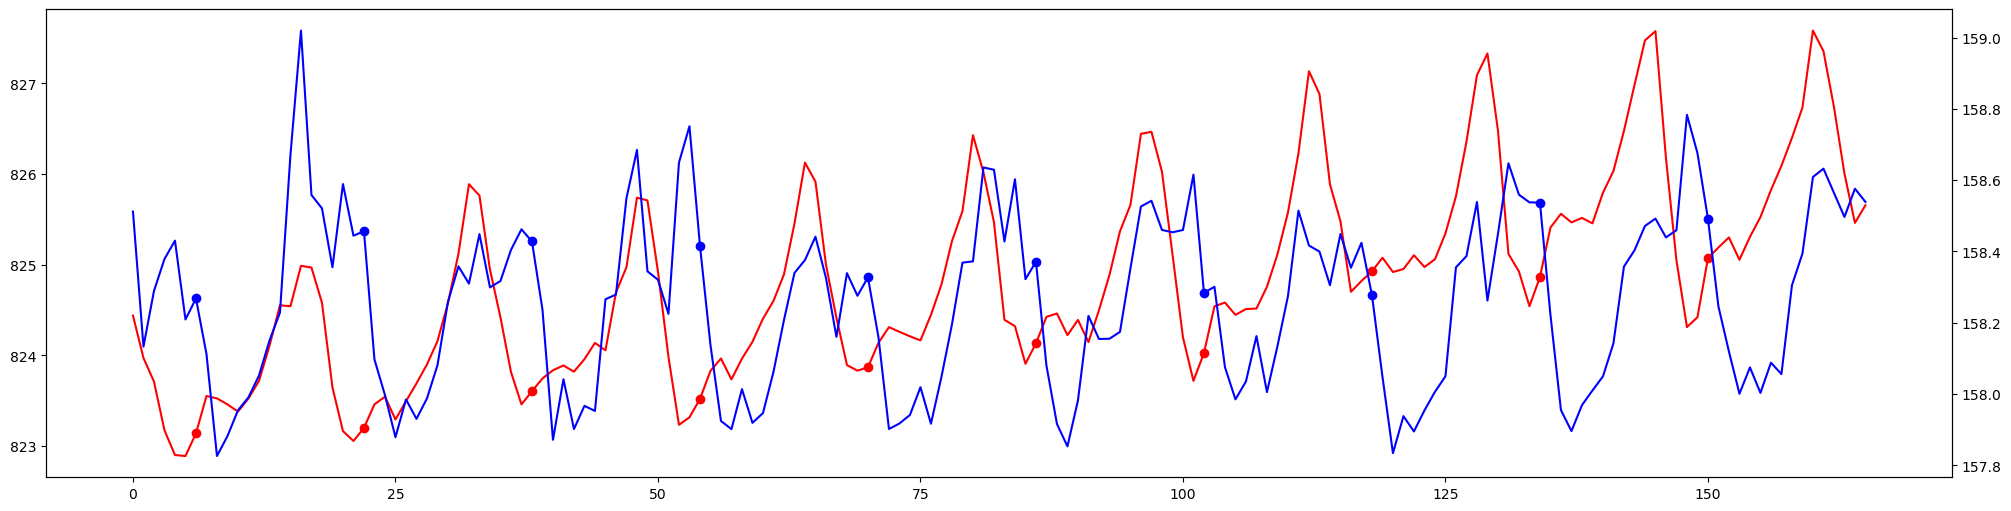

In [102]:
reload(fmriu)

exp_l = 166
fmri166_l = [e for s in subjects_data for e in s[0] if e.shape[0] == exp_l]
dmean = np.array([e.mean(axis=1) for e in fmri166_l]).mean(axis=0)
dstd = np.array([e.std(axis=1) for e in fmri166_l]).mean(axis=0)
numsfilter = [ e for e in fmriu.get_fmri_time_points_filter(
    fmri166_l[0].shape,
    num_before_last=1,
    time_series_num=166,
    scenarios_num=10,
    scenario_sec=22,
    rest_sec=10,
    hymodynamic_lag = 8 #8 seconds after onput of story, biggest BOLD response in brain
                        # (6-8s generally, go with 8 for now)
    )
    if e <= exp_l
]
x = range(0, exp_l)
print(numsfilter)
fig, ax = plt.subplots(figsize=(20, 5), layout='constrained')
l1, = ax.plot(x, dmean, label='mean', color='red', markevery=numsfilter, marker="o")
ax2 = ax.twinx()
l2, = ax2.plot(x, dstd, label='std', color='blue', markevery=numsfilter ,marker="o")


In [3]:
import pandas as pd

df = pd.DataFrame(masked_data)
df.shape, len(scenarios)

((166, 37246), 10)

In [12]:
%matplotlib 

Using matplotlib backend: QtAgg


In [9]:
nums_filter

[10, 26, 42, 58, 74, 90, 106, 122, 138, 154]

In [15]:
import matplotlib.pyplot as plt
#df.std(axis=1).plot()
#plt.show()
df.mean(axis=1).plot()
plt.show()


In [42]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,158.748199,157.927063,157.715851,157.393372,157.649094,157.659729,157.606918,157.602646,157.335831,157.746414,...,157.746185,157.814896,157.829300,157.911926,158.029282,158.317245,157.730453,157.404114,157.841843,157.373734
1,876.125732,874.847900,874.393066,872.982788,873.714111,873.599670,874.499084,874.385132,874.476074,875.280090,...,879.150513,879.348633,878.673706,879.098022,878.976685,879.335449,877.576843,877.582153,877.525024,877.172180
